# Starling Fraud DS Task  

## Intro  
You are the first person with access to this data and as such are tasked with completing some **exploratory analysis and data visualisation** before creating a model to **predict the winner of the race**  

This piece of work represents some **adhoc analysis and a first draft** model attempt. The idea is to discuss some of your analysis and output in our discussion so the aim of this exercise is more to **facilitate our discussion** than to produce a perfect set of results. As such, please do not spend more than 90 minutes in total on these tasks. 

The output of this work will need to be understood by other data scientists and should be useful for any future projects using this data. As such, please provide appropriate annotations/commentary so that the work can be easily followed. 

You are free to use any tools at your disposal for these tasks but it will need to be reproducible by us in order to assess it. Ideally the model would be in the form of a python/R notebook but if you would prefer to use other tools or link to any other open source data, please do so.

## Libraries

In [12]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar as cal

In [14]:
import os, sys
sys.path.append('/Users/vi4863/Desktop/Projects/bc-starling-task/src')

In [15]:
# from src import test

In [16]:
pd.options.display.float_format = '{:.4f}'.format

In [17]:
%load_ext pycodestyle_magic
%pycodestyle_on

## Task 1 Data Visualisation:  
(45 Minutes Max)

Consider the best way to visualise this data. 

1) Create some key components that may be used within a data visualisation dashboard to present your analysis to other data scientists and/or a wider audience.  
2) As you explore the data, please note down any questions or concerns that come to mind, along with any insights and conclusions that you are able to draw using the visualisation components that you have built.


### Get Data

In [18]:
data_path = "../data/Horses.csv"
df = pd.read_csv(data_path)

### First Look

In [19]:
pd.set_option('display.max_columns', df.shape[1])

In [20]:
df.shape

(36819, 46)

In [21]:
df.head()

,RaceID,HorseID,Cloth,Stall,WeightValue,JockeyID,AllowanceValue,OverweightValue,TrainerID,OwnerID,LastRunDaysFlat,Age,Blinkers,Hood,Visor,EyeShield,Eyecover,TongueStrap,CheekPieces,ForecastPrice,StatCourse,StatDistance,StatCourseDistance,StartingPrice,Bred,DamID,SireID,DamSireID,Sex,Colour,YearBorn,MeetingID,RaceNumber,ScheduledTime,HorseCount,Runners,Going,Weather,Course_Distance,RaceType,TrackType,Handicap,eligibility,CourseID,MeetingDate,Won
0,989418,2963489,7,5.0000,132,1398052.0000,nan,nan,1198534,1289143.0000,26.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,16-Jan,nan,nan,nan,12-Jan,SAF,2803520.0000,2004880.0000,2179351.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0
1,989418,2972665,13,6.0000,132,1165412.0000,nan,nan,1188128,1140080.0000,nan,3.0000,nan,nan,nan,nan,nan,nan,nan,20-Jan,nan,nan,nan,40/1,SAF,2749301.0000,2960049.0000,2001540.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0
2,989418,2972662,9,7.0000,132,1239852.0000,nan,nan,1199122,1448576.0000,nan,3.0000,nan,nan,nan,nan,nan,nan,nan,10-Jan,nan,nan,nan,NaN,SAF,2761722.0000,2441786.0000,2123459.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0
3,989418,2960365,1,12.0000,132,1417524.0000,nan,nan,1049637,1487690.0000,33.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,07-Apr,nan,nan,nan,11-Oct,SAF,2347111.0000,2170013.0000,2071137.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,1
4,989418,2968596,11,8.0000,132,1354773.0000,nan,nan,1140041,1403676.0000,24.0000,3.0000,nan,nan,nan,nan,nan,nan,nan,08-Jan,nan,nan,nan,NaN,SAF,2618721.0000,2410998.0000,2170115.0000,f,b,nan,87048,1,##########,13,11.0000,Good,Cloudy,1312,Flat,Turf,nan,2YO only,380,02/05/2017,0


* Lots of nulls particularly variables describing tack  
* **ForecastPrice** & **StartingPrice** look like they should be odds, but have been corrupted to a date string.  


## Nulls

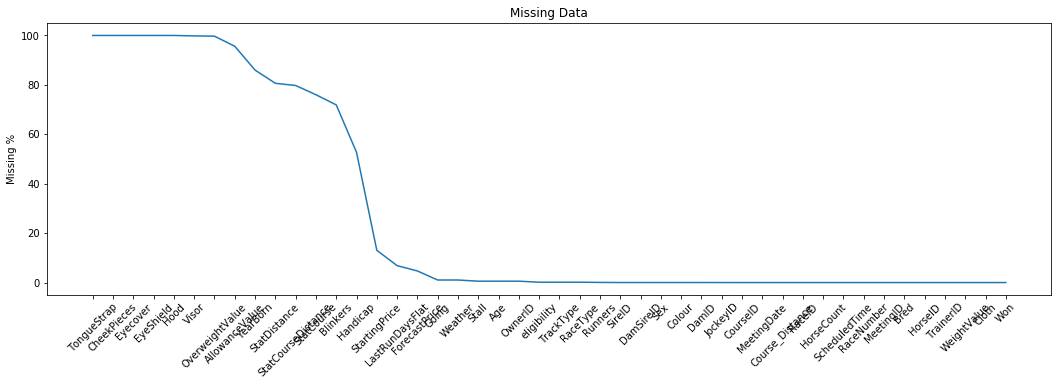

2:25: E128 continuation line under-indented for visual indent
3:25: E128 continuation line under-indented for visual indent
5:12: E124 closing bracket does not match visual indentation
6:1: W293 blank line contains whitespace
9:19: W291 trailing whitespace


In [22]:
missings = (pd.DataFrame(index=df.isnull().sum().index,
                        data=df.isnull().sum().values / len(df) * 100,
                        columns=['missing_pct'])
            .sort_values(by='missing_pct', ascending=False)
           )
         

plt.figure(figsize=(18, 5))
plt.plot(missings) 
plt.title('Missing Data')
plt.ylabel('Missing %')
plt.xticks(rotation=45)
plt.show()

In [23]:
high_missing = missings[missings.missing_pct > 60]
high_missing

,missing_pct
TongueStrap,100.0000
CheekPieces,100.0000
Eyecover,100.0000
EyeShield,100.0000
Hood,100.0000
Visor,99.8153
OverweightValue,99.7121
AllowanceValue,95.6300
YearBorn,85.9855
StatDistance,80.6404


In [24]:
# record these cols to remove from a modelling dset.
cols_to_remove = high_missing.index.values

In [25]:
# handicap has a lot of nulls, so taking a look to see how to deal with nulls
print(df.Handicap.value_counts(dropna=False))

# will replaces nulls with zero...
df['Handicap'] = df['Handicap'].fillna(0)

nan       19413
1.0000    17347
0.0000       59
Name: Handicap, dtype: int64


## Correct prices

In [26]:
# Fix prices as they're the odds and will be super useful for modelling!
prices = [col for col in df.columns if 'price' in col.lower()]

print(df[prices].dtypes)

ForecastPrice    object
StartingPrice    object
dtype: object


In [115]:
# create a month string to integer lookup...
cal_dict = dict(enumerate(cal.month_abbr))
# flip dictionary keys and values round the right way for mapping.
cal_dict = {v: k for (k, v) in cal_dict.items()}


def correct_prices(col: str, split_char: str) -> pd.Series:
    """Convert price column to a decimal.
    Parameters
    ----------
    col: str
        name of column containing prices to correct
    split_char: str
        the character used to split the column
    """
    has_char = df[col].str.contains(split_char)

    split_vals = (df[col]
                  [has_char.fillna(False)]
                  .str.split(split_char))

    numer, denom = split_vals.str[0], split_vals.str[1]
    denom_int = denom.map(cal_dict)

    numer.value_counts()  # found "Aug"!
    numer = numer.replace('Aug', '8').astype(int)

    return numer / denom_int

In [116]:
hyphens_corrected = correct_prices('StartingPrice', '-')

## CONT HERE

In [117]:
# this hasn't worked...
slashes_corrected = correct_prices('StartingPrice', '/')

In [121]:
nulls = slashes_corrected.isnull()

slashes_corrected[~nulls]

Series([], Name: StartingPrice, dtype: float64)

In [152]:
40/1
11/10

100/1


100.0

### Taking a look at the ID variables, are these discrete values useful?

In [29]:
# grabbing discrete ID vars

id_cols = [col for col in df.columns if 'id' in col.lower()]
id_cols

['RaceID',
 'HorseID',
 'JockeyID',
 'TrainerID',
 'OwnerID',
 'DamID',
 'SireID',
 'DamSireID',
 'MeetingID',
 'CourseID']

In [39]:
for col in id_cols:
    print(f"""{col}: {len(df[col].unique())}""")
    

RaceID: 3000
HorseID: 6064
JockeyID: 249
TrainerID: 160
OwnerID: 3078
DamID: 4182
SireID: 297
DamSireID: 734
MeetingID: 344
CourseID: 8


In [30]:
# let's convert the ID's to string as they're discrete.
df[id_cols].astype(str)

,RaceID,HorseID,JockeyID,TrainerID,OwnerID,DamID,SireID,DamSireID,MeetingID,CourseID
0,989418,2963489,1398052.0,1198534,1289143.0,2803520.0,2004880.0,2179351.0,87048,380
1,989418,2972665,1165412.0,1188128,1140080.0,2749301.0,2960049.0,2001540.0,87048,380
2,989418,2972662,1239852.0,1199122,1448576.0,2761722.0,2441786.0,2123459.0,87048,380
3,989418,2960365,1417524.0,1049637,1487690.0,2347111.0,2170013.0,2071137.0,87048,380
4,989418,2968596,1354773.0,1140041,1403676.0,2618721.0,2410998.0,2170115.0,87048,380
...,...,...,...,...,...,...,...,...,...,...
36814,1028128,2980319,1165412.0,1079200,1492946.0,2626929.0,2005847.0,2167985.0,91584,325
36815,1028128,2985033,1079281.0,1403297,1494400.0,2632498.0,2058573.0,2000564.0,91584,325
36816,1028128,2977403,1440495.0,1079200,1482459.0,2653726.0,2854936.0,2264809.0,91584,325
36817,1028128,2978297,1288634.0,1079234,1492370.0,2736480.0,2699207.0,2705498.0,91584,325


In [21]:
df.dtypes

RaceID                  int64
HorseID                 int64
Cloth                   int64
Stall                 float64
WeightValue             int64
JockeyID              float64
AllowanceValue        float64
OverweightValue       float64
TrainerID               int64
OwnerID               float64
LastRunDaysFlat       float64
Age                   float64
Blinkers              float64
Hood                  float64
Visor                 float64
EyeShield             float64
Eyecover              float64
TongueStrap           float64
CheekPieces           float64
ForecastPrice          object
StatCourse            float64
StatDistance          float64
StatCourseDistance    float64
StartingPrice          object
Bred                   object
DamID                 float64
SireID                float64
DamSireID             float64
Sex                    object
Colour                 object
YearBorn              float64
MeetingID               int64
RaceNumber              int64
ScheduledT

## Categorical variables...  
(are they all IDs?)

In [112]:
cats = df.select_dtypes('object').columns

In [122]:
cats

Index(['ForecastPrice', 'StartingPrice', 'Bred', 'Sex', 'Colour',
       'ScheduledTime', 'Going', 'Weather', 'RaceType', 'TrackType',
       'eligibility', 'MeetingDate'],
      dtype='object')

In [114]:
df[cats].head()

,ForecastPrice,StartingPrice,Bred,Sex,Colour,ScheduledTime,Going,Weather,RaceType,TrackType,eligibility,MeetingDate
0,16-Jan,12-Jan,SAF,f,b,##########,Good,Cloudy,Flat,Turf,2YO only,02/05/2017
1,20-Jan,40/1,SAF,f,b,##########,Good,Cloudy,Flat,Turf,2YO only,02/05/2017
2,10-Jan,NaN,SAF,f,b,##########,Good,Cloudy,Flat,Turf,2YO only,02/05/2017
3,07-Apr,11-Oct,SAF,f,b,##########,Good,Cloudy,Flat,Turf,2YO only,02/05/2017
4,08-Jan,NaN,SAF,f,b,##########,Good,Cloudy,Flat,Turf,2YO only,02/05/2017


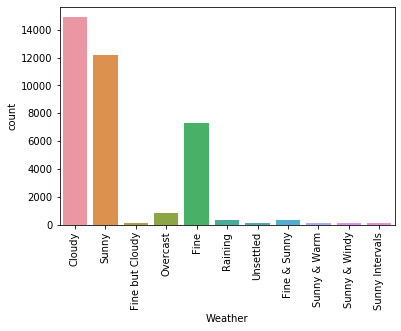

In [129]:
sns.countplot(x='Weather', data=df)
plt.xticks(rotation=90)
plt.show()


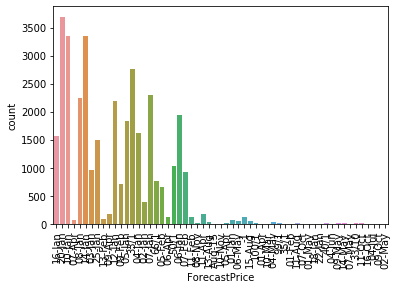

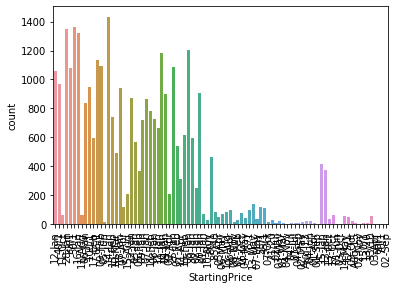

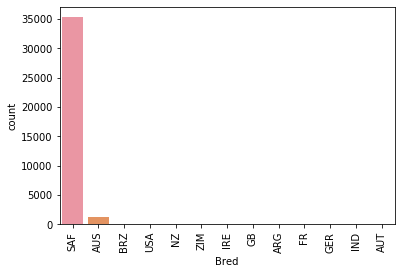

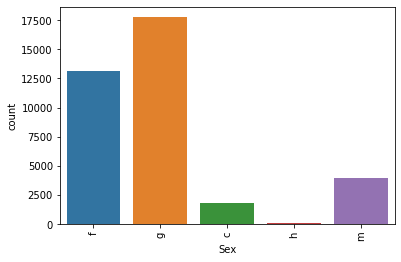

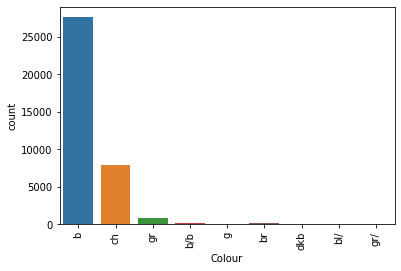

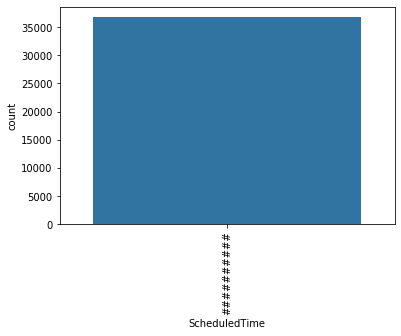

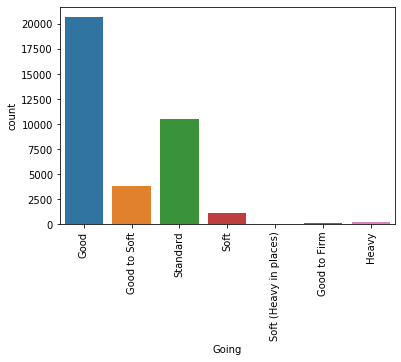

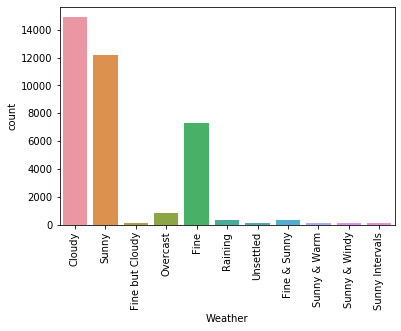

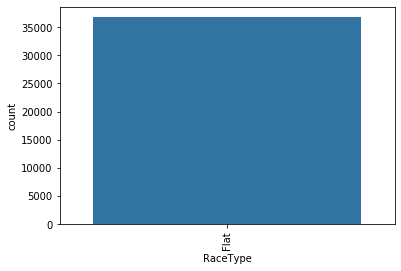

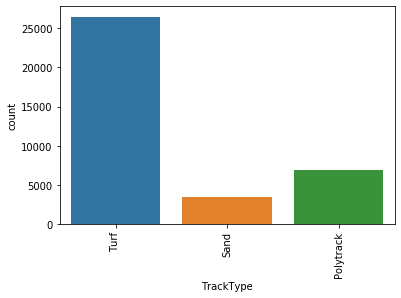

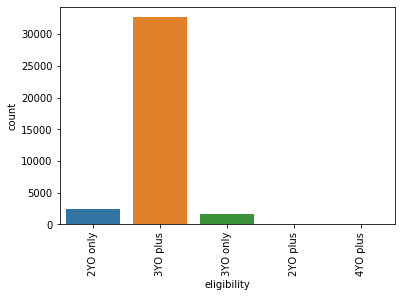

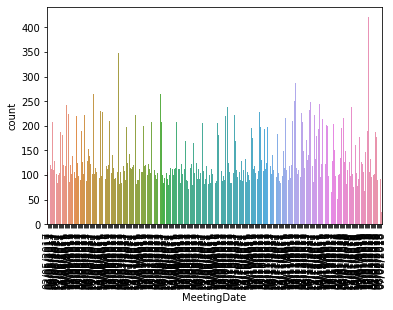

In [131]:
for c in cats:
#     nulls = df[c].isnull()
#     plt.hist(df[~nulls][c])
    sns.countplot(x=c, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
cols_to_remove = ['RaceType', # all flat races
                  'ScheduledTime',  # 
                 ]

## Visualisation

In [ ]:
# TODO pairs plot?

## Task 2 Modelling:  
(45 Minutes Max)

1) Build a model (or models) to predict the winner.  
2) Evaluate your model(s) performance and briefly detail any methods or logic you are using to do so.

In [109]:
y = df['Won']

In [111]:
y.value_counts()

0    33912
1     2907
Name: Won, dtype: int64